- title: The Normal Distribution and the Central Limit Theorem 
- tags: distributions, statistics
- date: 2018-12-3

The main reason scientists like the normal distribution so much is because of a little thing called the **central limit theorem (CLT)**.  

I'm not going to walk you through a tedious proof of the CLT; instead, we'll just look at some graphs and talk about some intuition.

The core idea of the CLT is this: imagine there is a quantity of interest out there in the world, and it is distributed according to any arbitrary distribution, and you want to know the mean. For example, suppose you are interested in knowing the average income in the United States. We known, empirically, that incomes tend to be distributed according to a lognormal distribution.

One sensible way we might choose to figure out the mean income in the United States is by drawing a random sample. 

So, suppose we have a pretty good list of every person in the country and their phone numbers. We might randomly pick, say, a thousand of them to call.  If we were doing this course in a heavily math-ey approach, we might here say "the expected value of the sampling mean is equal to the population mean," and we might talk about a proof of that, and use a bunch of [complicated vocabulary](https://www.stat.berkeley.edu/~stark/Java/Html/SampleDist.htm). Here, I'm just going to draw out some intuition. 

Hold in your head a picture of the log-normal distribution. Like this: 

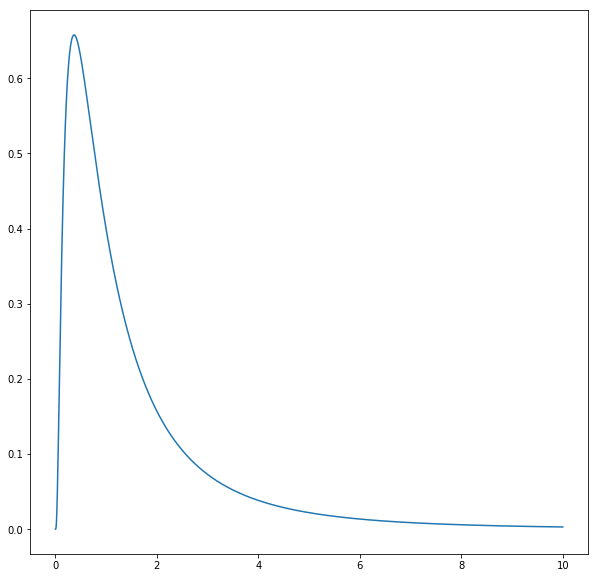

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
np.random.seed(10)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(0, 10, 5000)
y = stats.lognorm.pdf(x, 1) 
ax.plot(x, y)

Now imagine you threw darts at the graph, without aiming at a particular part of the graph. On the whole, you'd expect that when the darts hit inside the figure, they'd more or less spread out proportional to the area of the graph, that is, areas of the graph that are bigger would have more dots in them.  Moreover, you'd expect that this proportionality property would be more consistent the more darts you throw.  If you just toss one dart in, it could land anywhere.  If you toss a million darts in, the shape of the area they occupy within the graph is likely to be essentially the same as the shape of the graph itself. 

Let's do that.

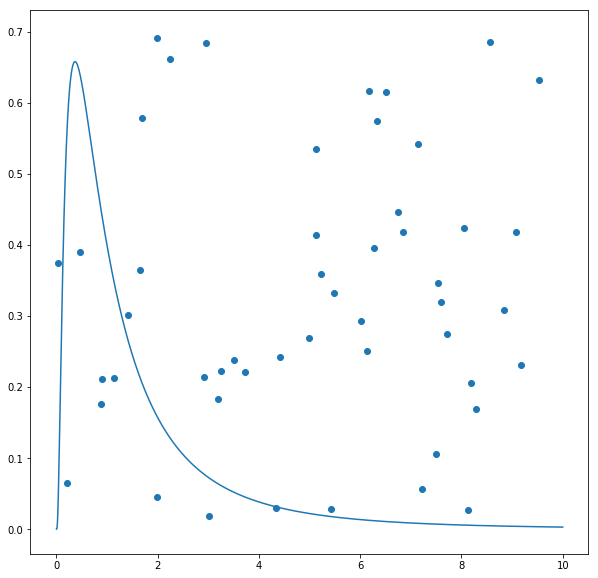

In [2]:
x2 = np.random.uniform(0, 10, 50)
y2 = np.random.uniform(0, 0.7, 50)
ax.scatter(x2, y2)
fig

Ok, so that's a small sample.  Focusing our attention on the stuff within the distribution (under the curve) it looks kinda proportional.  Let's take a much larger sample, or throw a bunch more darts

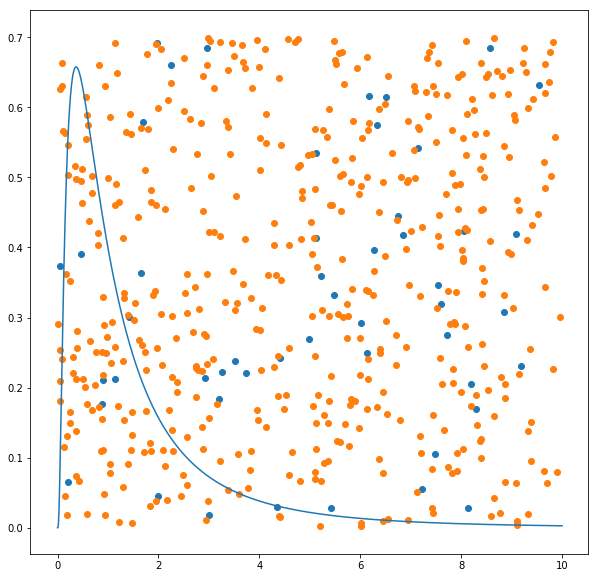

In [3]:
x3 = np.random.uniform(0, 10, 500)
y3 = np.random.uniform(0, 0.7, 500)
ax.scatter(x3, y3)
fig

Unsurprisingly, where there's more space under the graph, there's also more dots. And this should allow you to see intuitively how we ought to expect the average x value of the random observations of a variable with that distribution, or, indeed, any distribution, to typically be close to the average x value of the entite universe of possible observations (the population).

That, in a nutshell, is why random sampling. 

Now suppose we did that a bunch of times. That is, we had our list of people and their phone numbers, and we picked a thousand of them, and called them, and asked them about their income.  Then we picked a thousand people again, and ask them about their income.  And again.  And again.  And again.  In stats-ese, we sampled them repeatedly. 

The properties of those samples *also has a distribution*. This is called a [sampling distribution](https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library) In particular, the means of those samples also have a distribution.  But before I tell you what that distribution is, let's simulate it with some code. 

We'll generate a lot of random lognormal data (again, representing income), and then we'll sample from it repeatedly, and for each of our samples, we'll write down the mean, and we'll see how those means are distributed.

In [4]:
income_population = stats.lognorm.rvs(s=1, size=100000)

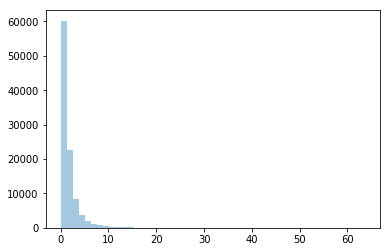

In [5]:
sns.distplot(income_population, kde=False)

In [6]:
def draw_samples(population, sample_size, num_samples):
    out = []
    for sample_count in range(num_samples):
        sample = np.random.choice(population, sample_size)
        sample_mean = np.mean(sample)
        out.append(sample_mean)
    return out

Let's take a look at the mean of our underlying population, and then draw 1000 samples of 1000 people from it.

In [7]:
print("mean of population: " + str(np.mean(income_population)))

thousand_by_thousand = draw_samples(income_population, 1000, 1000)

mean of population: 1.6401919934665843


What's the mean of our sample means?

In [8]:
print("mean of sample means: " + str(np.mean(thousand_by_thousand)))

mean of sample means: 1.6418233091016603


Look at that!  It's really close, isn't it.  Wanna see something even cooler?

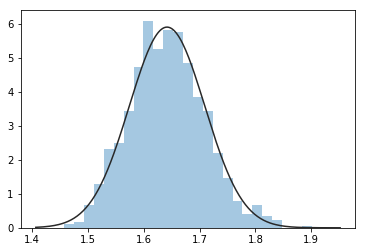

In [9]:
sns.distplot(thousand_by_thousand, kde=False, fit=stats.norm)

That's right.  It looks super normal, and it's centered on the population mean.  This is the central limit theorem in action: when we take random samples from a population, *even if the distribution itself isn't normal*, the distribution *of the sample means* will be normally distributed with a mean equal to the population mean. 

This is why we can estimate the mean of some property of a population just by sampling it---why, for example, the media can get a pretty good guess about who will win an election by asking a bunch of people at random. 

Incidentally, the central limit theorem works better for larger sample sizes, and for larger numbers of samples.  So if we did just a handful of tiny little samples: 

mean of tiny sample means: 1.4209647606225455


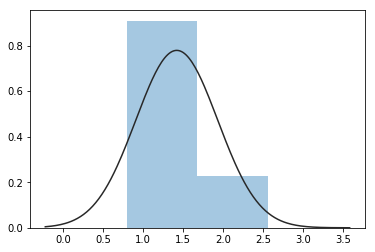

In [10]:
ten_by_ten = draw_samples(income_population, 10, 10)
sns.distplot(ten_by_ten, kde=False, fit=stats.norm)
print("mean of tiny sample means: " + str(np.mean(ten_by_ten)))

that doesn't work so well.  If we make the samples larger, it's more likely that they'll cluster around the population mean (just like when we threw more darts up above), so at least the mean will tend to be in the right place: 

mean of big sample small number means: 1.6524830072730474


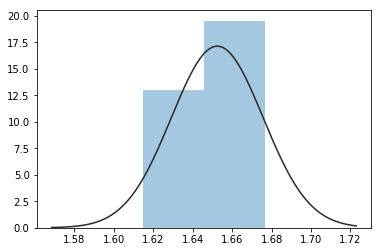

In [11]:
big_sample_small_number = draw_samples(income_population, 5000, 10)
sns.distplot(big_sample_small_number, kde=False, fit=stats.norm)
print("mean of big sample small number means: " + str(np.mean(big_sample_small_number)))

So at last we know if we get big samples we're more likely to get the mean right.  (This is an intuitive way of saying that the variance of sample means falls with sample size... about which more down the line.) 

That being said, even with tiny samples, the expected value of the mean still is the population mean, so if we imagined doing a *lot* of tiny samples, they would still be more or less normally distributed around the true mean... it's just that we couldn't have a lot of confidence in any individual sample. 

mean of lots of tiny samples: 1.6153836567656796


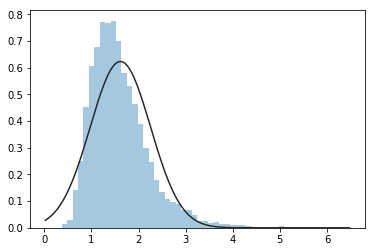

In [12]:
lots_of_tiny_samples = draw_samples(income_population, 10, 5000)
sns.distplot(lots_of_tiny_samples, kde=False, fit=stats.norm)
print("mean of lots of tiny samples: " + str(np.mean(lots_of_tiny_samples)))

Overall, though, we'd like to take large samples, and we can be very confident that a large number of large samples would match the theoretical normal distribution.

mean of lots of big samples: 1.640079988885174


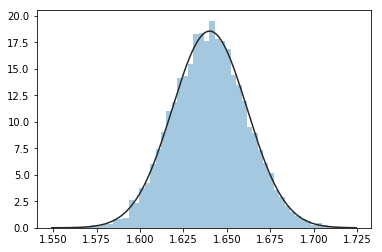

In [13]:
bigbig = draw_samples(income_population, 10000, 10000)
sns.distplot(bigbig, kde=False, fit=stats.norm)
print("mean of lots of big samples: " + str(np.mean(bigbig)))

### Why does this stuff matter?

It turns out that all of this is the basis of **hypothesis testing**.  We'll delve into this more down the line, but here's the basic idea. 

Suppose you think that some fact is true about the world---for example, you have a theory saying that the average income of Americans should be about the same as a known quantity $\mu$ (let's say you know the average income in Iowa, it's $\mu$, and you think America as a whole looks like Iowa, income-wise).  Or you have a theory saying they should be different. 

Now supose you draw a large sample of Americans' incomes and take the mean of that sample. You know that this is, effectly, a single observation of a variable (the distribution of sampling means) which is normally distributed---that's what we just learned from the central limit theorem. And (it will turn out... we'll get there) you can estimate the standard deviation of that normal distribution too. 

Now, suppose your mean of the sample of American incomes is wildly different from the mean of Iowan incomes---say it's three standard deviations away. That would be pretty unlikely if you were *actually* drawing from a population with the mean of Iowan's incomes. Not impossible, just... unlikely. We know that a very small percentage of draws from a normal distribution with a given mean $\mu$ are going to be three whole standard deviations away from $\mu$. Rather than think "wow, I guess we got a freakish sample from something with mean $\mu$" you might be motivated to instead think "hmm, maybe the mean of American incomes isn't $\mu$ -- maybe Americans and Iowans aren't the same.

That little intuition is the basis for the enterprise of hypothesis testing, p-values, significance levels, all the asterisks you see in scientific papers, and so forth. We will explore it further in subsequent lessons.